<a href="https://colab.research.google.com/github/hosseinrezaie0/FingerdDrectionDetection/blob/master/Project_CountDrectionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import pickle
import cv2
import os

# Count model

In [3]:
DATADIR = "/content/drive/My Drive/Projects/FingerDrectionDetection/train"
TESTDIR = "/content/drive/MyDrive/Projects/FingerDrectionDetection/test"
CATEGORIES = ['0','1','2','3','4','5']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocessing

### Get the data

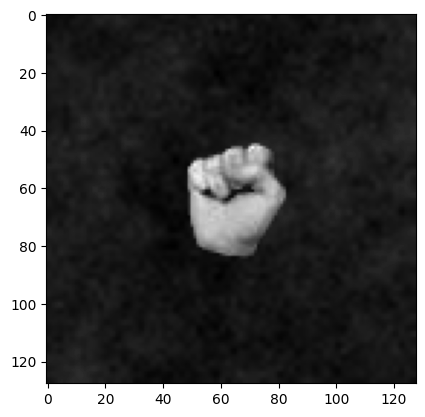

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)     #path to a class
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

In [ ]:
print(img_array)

[[36 35 32 ... 50 50 50]
 [35 35 33 ... 49 49 49]
 [34 34 33 ... 47 46 45]
 ...
 [47 47 49 ... 43 41 41]
 [41 42 45 ... 41 36 34]
 [38 40 42 ... 39 34 31]]


In [ ]:
img_array.shape

(128, 128)

### resize the images

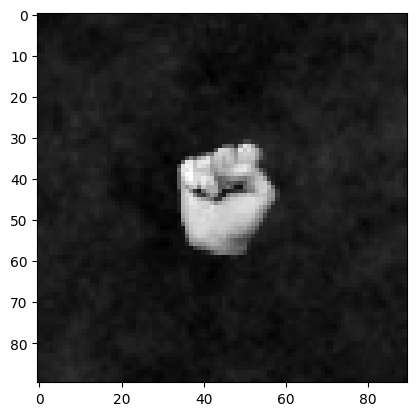

In [ ]:
IMG_SIZE = 90

resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(resized_img, cmap="gray")
plt.show()

### Create train dataset


In [ ]:
train_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)     #path to a class
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      train_data.append([resized_img, class_num])
create_training_data()

In [ ]:
len(train_data)

14400

In [ ]:
# Shuffle

random.shuffle(train_data)

In [ ]:
# Get the first 20 shuffled data
for sample in train_data[:20]:
  print(sample[1])

0
4
4
4
2
0
5
5
0
2
4
4
0
5
0
0
4
0
3
4


### Split the train data into x_train and y_train

In [ ]:
x_train = []
y_train = []

In [ ]:
for features, label in train_data:
  x_train.append(features)
  y_train.append(label)

In [ ]:
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

In [ ]:
x_train.shape

(14400, 90, 90, 1)

In [ ]:
y_train.shape

(14400,)

### Save train data


In [ ]:
pickle.dump(x_train, open("/content/count_x_train.pickle", "wb"))
pickle.dump(y_train, open("/content/count_y_train.pickle", "wb"))

### Load train data

In [ ]:
x_train = pickle.load(open("/content/drive/MyDrive/Projects/FingerDrectionDetection/count_x_train.pickle", "rb"))
y_train = pickle.load(open("/content/drive/MyDrive/Projects/FingerDrectionDetection/count_y_train.pickle", "rb"))

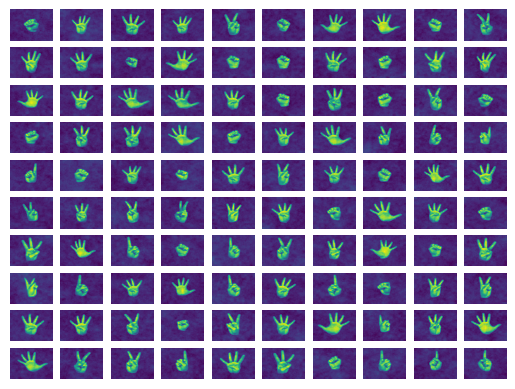

In [ ]:
fig, ax =plt.subplots(10,10)
k = 0
for i in range(10):
  for j in range(10):
    ax[i][j].axis("off")
    ax[i][j].imshow(x_train[k], aspect="auto")
    k = k + 1

### Normalization

In [ ]:
x_train

array([[[[74],
         [68],
         [65],
         ...,
         [59],
         [60],
         [64]],

        [[70],
         [67],
         [65],
         ...,
         [61],
         [60],
         [60]],

        [[67],
         [67],
         [65],
         ...,
         [63],
         [60],
         [58]],

        ...,

        [[65],
         [63],
         [59],
         ...,
         [70],
         [72],
         [74]],

        [[65],
         [63],
         [62],
         ...,
         [69],
         [71],
         [73]],

        [[64],
         [61],
         [62],
         ...,
         [70],
         [69],
         [69]]],


       [[[67],
         [67],
         [69],
         ...,
         [42],
         [41],
         [42]],

        [[66],
         [66],
         [68],
         ...,
         [42],
         [42],
         [44]],

        [[66],
         [66],
         [67],
         ...,
         [42],
         [43],
         [45]],

        ...,

        [[44],
 

In [ ]:
x_train.shape

(14400, 90, 90, 1)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train = x_train/255

## Train the model

In [ ]:
model = Sequential()

# Layer 1
model.add(Conv2D(64, kernel_size=(3,3), input_shape = x_train.shape[1:],use_bias=True))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 2
model.add(Conv2D(64, kernel_size=(3,3),use_bias=True))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 3
model.add(Conv2D(128, kernel_size=(3,3), kernel_regularizer =tf.keras.regularizers.l2( l=0.01),use_bias=True))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

# Layer 4
model.add(Conv2D(128, kernel_size=(3,3), kernel_regularizer =tf.keras.regularizers.l2( l=0.01),use_bias=True))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Layer 5
model.add(Dense(512,use_bias=True))
model.add(Activation("relu"))
model.add(Dropout(0.2))

# Layer 6
model.add(Dense(6,use_bias=True))
model.add(Activation("softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

hist = model.fit(x_train, y_train, batch_size =32, validation_split = 0.2, epochs=10)

Epoch 1/10
360/360 [==============================] - 12s 17ms/step - loss: 1.4293 - accuracy: 0.9359 - val_loss: 0.7168 - val_accuracy: 0.9951
Epoch 2/10
360/360 [==============================] - 6s 15ms/step - loss: 0.5364 - accuracy: 0.9949 - val_loss: 0.3937 - val_accuracy: 0.9993
Epoch 3/10
360/360 [==============================] - 6s 17ms/step - loss: 0.3040 - accuracy: 0.9977 - val_loss: 0.2171 - val_accuracy: 1.0000
Epoch 4/10
360/360 [==============================] - 6s 17ms/step - loss: 0.1769 - accuracy: 0.9981 - val_loss: 0.1537 - val_accuracy: 0.9955
Epoch 5/10
360/360 [==============================] - 7s 20ms/step - loss: 0.1139 - accuracy: 0.9975 - val_loss: 0.0867 - val_accuracy: 0.9983
Epoch 6/10
360/360 [==============================] - 6s 15ms/step - loss: 0.0965 - accuracy: 0.9946 - val_loss: 0.0825 - val_accuracy: 0.9976
Epoch 7/10
360/360 [==============================] - 6s 16ms/step - loss: 0.0707 - accuracy: 0.9970 - val_loss: 0.0454 - val_accuracy: 0.999

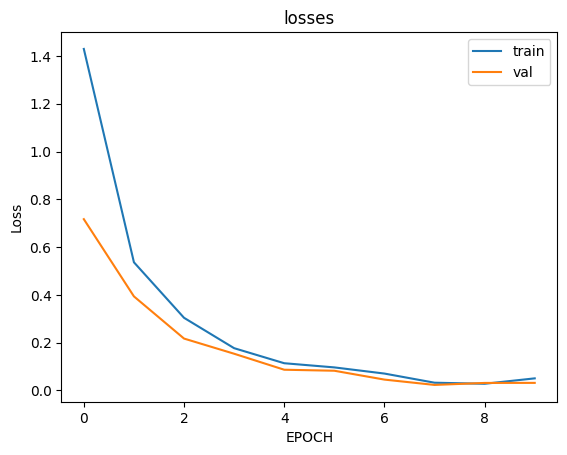

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("losses")
plt.ylabel("Loss")
plt.xlabel("EPOCH")
plt.legend(["train","val"], loc="upper right")


## Save the model

In [ ]:
pickle.dump(model, open("/content/count_model.pickle", "wb"))

## Load the model

In [4]:
count_model = pickle.load(open("/content/drive/MyDrive/Projects/FingerDrectionDetection/count_model.pickle", "rb"))

## Test the model

In [5]:
IMG_SIZE = 90


# Create test data
test_data = []
def create_testing_data():
  for category in CATEGORIES:
    path = os.path.join(TESTDIR, category)     #path to a class
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      resized_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      test_data.append([resized_img, class_num])
create_testing_data()

# Shuffle
random.shuffle(test_data)

# Split to x_test and y_test
x_test = []
y_test = []

for features, label in test_data:
  x_test.append(features)
  y_test.append(label)

In [ ]:
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)


In [ ]:
x_test.shape

(3600, 90, 90, 1)

In [ ]:
loss, acc = count_model.evaluate(x_test, y_test, verbose=0)

In [ ]:
loss

0.04777996242046356

In [ ]:
acc

1.0